# 3. Bivariate Analysis

Combinations of two variables are analyzed in this section. Specifically, the relationships between Year and Magnitude, Latitudes and Longitudes are explored. To do so, the dataset is partitioned into five subsets of 1000 years each. The country with highest number of earthquakes and highest magnitude in each set is identified and visualized through scatter plots and line graphs. The trend of these countries is analysed throughout the five subsets through line graphs. All the earthquakes are then plotted on a world map for a visual display. Insights are provided at the end of this notebook. 

This section contains the following: 

    3.1. Year and Magnitude
    3.2. Top four countries in detail
    3.3. Plotting the earthquakes on a world map
    3.4. Insights

In [109]:
# Importing the required modules

import pandas as pd
import numpy as np
import plotly as ply
import plotly.express as px

In [110]:
# Reading the dataset into a dataframe

bivariate_analysis = pd.read_csv("C:\\Users\\Sharmila\\Sharmila_Kuthunur Analysis of NOAA Significant Earthquakes Dataset\\1. Preprocessing\\Dataset for Analysis.csv")

In [111]:
# Printing the dataset

print(bivariate_analysis)

      Unnamed: 0  Year  Tsu  Vol                              Name  Latitude  \
0              0 -2150    ?    ?      JORDAN: BAB-A-DARAA,AL-KARAK    31.100   
1              1 -2000  Tsu    ?                     SYRIA: UGARIT    35.683   
2              2 -2000    ?    ?                   TURKMENISTAN: W    38.000   
3              3 -1610  Tsu  Vol  GREECE: THERA ISLAND (SANTORINI)    36.400   
4              4 -1566    ?    ?           ISRAEL: ARIHA (JERICHO)    31.500   
...          ...   ...  ...  ...                               ...       ...   
6139        6139  2019    ?    ?         PAKISTAN: MIRPUR DISTRICT    33.106   
6140        6140  2019    ?    ?          INDONESIA: MALUKU: AMBON    -3.450   
6141        6141  2019    ?    ?                  TURKEY: ISTANBUL    40.890   
6142        6142  2019    ?    ?              CHILE: SOUTH CENTRAL   -40.815   
6143        6143  2019    ?    ?                 CHILE: CONCEPCION   -35.473   

      Longitude  Mag MMI Int       Coun

## 3.1. Year and Magnitude

This section is divided into: 

    3.1.1. Scatter plot of Year and Magnitude
    3.1.2. Partitioning Years column to analyze trends
    3.1.3. Number of earthquakes over the years
    3.1.4. Trend in most frequent magnitude over the years
    3.1.5. Trend in highest magnitude over the years
    3.1.6. Countries with maximum number of earthquakes

### 3.1.1. Scatter plot of Year and Magnitude

In [112]:
# Overview of the Years and Magnitude columns

years_overview = bivariate_analysis['Year']
print(years_overview.describe())

magnitude_overview = bivariate_analysis['Mag']
print(magnitude_overview)

count    6144.000000
mean     1804.691243
std       376.404999
min     -2150.000000
25%      1820.000000
50%      1928.000000
75%      1988.000000
max      2019.000000
Name: Year, dtype: float64
0       7.3
1         ?
2       7.1
3         ?
4         ?
       ... 
6139    5.6
6140    6.5
6141    5.7
6142    6.1
6143    6.8
Name: Mag, Length: 6144, dtype: object


In [113]:
# Viewing the missing values in years column

print(years_overview.isna().sum())
print(magnitude_overview.isna().sum())

0
0


The output for both of them is zero because the missing values are represented by '?'. The following code checks the count for '?'. 

In [114]:
# Frequency of missing values in Magnitude and Year columns

print(len(bivariate_analysis[bivariate_analysis['Year'] == '?']))
print(len(bivariate_analysis[bivariate_analysis['Mag'] == '?']))

0
1783


In [115]:
# Accessing rows for which column Mag has '?'

magnitude_updated = bivariate_analysis[bivariate_analysis['Mag'] == '?' ].index

# Deleting these row indexes from the dataframe

bivariate_analysis.drop(magnitude_updated, inplace=True)

In [116]:
# Verifying that there are no more missing values
print(len(bivariate_analysis[bivariate_analysis['Mag'] == '?']))

0


In [117]:
# Importing the required modules to plot the graph

import plotly.graph_objects as go
import numpy as np

# Setting X and Y axes

x = bivariate_analysis['Year'].unique()
y = bivariate_analysis['Mag'].unique()

# Plotting the graph

fig = go.Figure(data=go.Scatter(x=x,y=y))
fig.update_layout(title='Trend in magnitude over the years',
                   xaxis_title='Year',
                   yaxis_title='Magnitude')
fig.show()

### 3.1.2. Partitioning Years to Analyse Trends

Here, the years used are the offset values from 0 to 4169. Using these values, the dataset is partitioned into five sets of 1000 years each: 0 to 1000, 1001 to 2001, 2002 to 3002, 3003 to 4003, 4004 to 5004. For each set, the frequency of earthquakes, magnitudes and their countries are identified. The country with highest number of earthquakes is noted down for each set. They turn out to be Israel, Greece, Turkey, and China. The number of earthquakes in these countries over the years is plotted in a single line graph in 3.2. 

This section contains the following: 

    3.1.2.1. Years 0 to 1000
    3.1.2.2. Years 1001 to 2001
    3.1.2.3. Years 2002 to 3002
    3.1.2.4. Years 3003 to 4003
    3.1.2.5. Years 4004 to 5004

In [118]:
# Partitioning the dataset into 1000 years each

bivariate_analysis_year = pd.read_csv("C:\\Users\\Sharmila\\Sharmila_Kuthunur Analysis of NOAA Significant Earthquakes Dataset\\1. Preprocessing\\Dataset for Analysis.csv")

years_set_one = bivariate_analysis_year.loc[(bivariate_analysis_year['UpdatedYear'] >= 0) & (bivariate_analysis_year['UpdatedYear'] <= 1000)]
years_set_two = bivariate_analysis_year.loc[(bivariate_analysis_year['UpdatedYear'] >= 1001) & (bivariate_analysis_year['UpdatedYear'] <= 2001)]
years_set_three = bivariate_analysis_year.loc[(bivariate_analysis_year['UpdatedYear'] >= 2002) & (bivariate_analysis_year['UpdatedYear'] <= 3002)]
years_set_four = bivariate_analysis_year.loc[(bivariate_analysis_year['UpdatedYear'] >= 3003) & (bivariate_analysis_year['UpdatedYear'] <= 4003)]
years_set_five = bivariate_analysis_year.loc[(bivariate_analysis_year['UpdatedYear'] >= 4004) & (bivariate_analysis_year['UpdatedYear'] <= 5004)]

#### 3.1.2.1. Years 0 to 1000 

In [119]:
# Printing the first set and number of occurrences

print(years_set_one)
print(len(years_set_one))

   Unnamed: 0  Year  Tsu  Vol                              Name  Latitude  \
0           0 -2150    ?    ?      JORDAN: BAB-A-DARAA,AL-KARAK    31.100   
1           1 -2000  Tsu    ?                     SYRIA: UGARIT    35.683   
2           2 -2000    ?    ?                   TURKMENISTAN: W    38.000   
3           3 -1610  Tsu  Vol  GREECE: THERA ISLAND (SANTORINI)    36.400   
4           4 -1566    ?    ?           ISRAEL: ARIHA (JERICHO)    31.500   
5           5 -1450    ?    ?               ITALY: LACUS CIMINI    35.500   
6           6 -1365  Tsu    ?                     SYRIAN COASTS    35.683   
7           7 -1250    ?    ?           ISRAEL: ARIHA (JERICHO)    32.000   

   Longitude  Mag MMI Int        Country                     Region  \
0       35.5  7.3       ?         JORDAN       BAB-A-DARAA,AL-KARAK   
1       35.8    ?    10.0          SYRIA                     UGARIT   
2       58.2  7.1    10.0   TURKMENISTAN                          W   
3       25.4    ?     

In [120]:
# Number of occurrences in each Country

frequency_first_set = years_set_one['Country'].value_counts(dropna=False)
print(frequency_first_set)

ISRAEL           2
JORDAN           1
SYRIA            1
ITALY            1
SYRIAN COASTS    1
GREECE           1
TURKMENISTAN     1
Name: Country, dtype: int64


In [121]:
# Most frequent magnitude of earthquke

magnitude_first_set = years_set_one['Mag'].value_counts(dropna=False)
print(magnitude_first_set)

?      5
7.3    1
7.1    1
6.5    1
Name: Mag, dtype: int64


In [122]:
# Highest magnitude
magnitude_maximum = years_set_one[years_set_one.Mag != '?']
print(magnitude_maximum.max())

# Lowest magnitude

magnitude_minimum = years_set_one[years_set_one.Mag != '?']
print(magnitude_maximum.min())


Unnamed: 0                   7
Year                     -1250
Tsu                          ?
Vol                          ?
Name           TURKMENISTAN: W
Latitude                    38
Longitude                 58.2
Mag                        7.3
MMI Int                      ?
Country           TURKMENISTAN
Region                       W
UpdatedYear                900
dtype: object
Unnamed: 0                           0
Year                             -2150
Tsu                                  ?
Vol                                  ?
Name           ISRAEL: ARIHA (JERICHO)
Latitude                          31.1
Longitude                         35.5
Mag                                6.5
MMI Int                           10.0
Country                         ISRAEL
Region                 ARIHA (JERICHO)
UpdatedYear                          0
dtype: object


#### 3.1.2.2. Years 1001 to 2001 


In [123]:
# Printing the second set and number of occurrences

print(years_set_two)
print(len(years_set_two))

    Unnamed: 0  Year  Tsu  Vol                                Name  Latitude  \
8            8 -1050    ?    ?      JORDAN: SW: TIMNA COPPER MINES    29.600   
9            9  -759    ?    ?                   ISRAEL: JERUSALEM    33.000   
10          10  -590  Tsu    ?                 LEBANON: SUR (TYRE)    33.270   
11          11  -550    ?    ?              GREECE: MOUNT TAYGETUS    37.000   
12          12  -525  Tsu    ?  LEBANON: SUR (TYRE), SAYDA (SAIDA)    33.560   
13          13  -480  Tsu    ?                GREECE: SARONIC GULF    37.900   
14          14  -479  Tsu    ?                   GREECE: MACEDONIA    39.700   
15          15  -432    ?    ?           GREECE: ROMAN TERRITORIES    37.000   
16          16  -426  Tsu    ?                      GREECE: EUBOEA    38.900   
17          17  -400    ?    ?               IRAN: REY,EIVAN-E-KAY    35.500   
18          18  -373  Tsu    ?                              GREECE    38.250   
19          19  -364    ?    ?          

In [124]:
# Number of occurrences in each Country

frequency_second_set = years_set_two['Country'].value_counts(dropna=False)
print(frequency_second_set)

GREECE                    10
ITALY                      3
CHINA                      2
LEBANON                    2
KYRGYZSTAN                 1
JORDAN                     1
INDIA                      1
ISRAEL                     1
EGYPT                      1
SPAIN                      1
IRAN                       1
PORTUGAL                   1
EAST MEDITERRANEAN SEA     1
TURKEY                     1
Name: Country, dtype: int64


In [125]:
# Most frequent magnitude of earthquke

magnitude_second_set = years_set_two['Mag'].value_counts(dropna=False)
print(magnitude_second_set)

?      17
7.0     3
7.3     1
7.6     1
6.5     1
7.1     1
7.2     1
6.2     1
6.7     1
Name: Mag, dtype: int64


In [126]:
# Highest magnitude
magnitude_maximum = years_set_two[years_set_two.Mag != '?']
#print(magnitude_maximum.max())

# Lowest magnitude

magnitude_minimum = years_set_two[years_set_two.Mag != '?']
print(magnitude_maximum.min())

Unnamed: 0                         8
Year                           -1050
Tsu                                ?
Vol                                ?
Name           CHINA: GANSU PROVINCE
Latitude                        29.6
Longitude                      22.25
Mag                              6.2
MMI Int                         10.0
Country                        CHINA
UpdatedYear                     1100
dtype: object


#### 3.1.2.3. Years 2002 to 3002

In [127]:
# Printing the third set and number of occurrences

print(years_set_three)
print(len(years_set_three))

     Unnamed: 0  Year  Tsu Vol  \
35           35   -70    ?   ?   
36           36   -63    ?   ?   
37           37   -60  Tsu   ?   
38           38   -58  Tsu   ?   
39           39   -50  Tsu   ?   
..          ...   ...  ...  ..   
221         221   847    ?   ?   
222         222   847    ?   ?   
223         223   850    ?   ?   
224         224   850  Tsu   ?   
225         225   851    ?   ?   

                                                  Name  Latitude  Longitude  \
35                            CHINA: SHANDONG PROVINCE     36.30     119.00   
36                                  RUSSIA: PANTIKAPEY     45.20      36.60   
37                          PORTUGAL: CABO SAN VICENTE     36.00     -10.00   
38                                 ALBANIA: DYRRACHIUM     41.30      19.50   
39   BULGARIA: BISONE [KAVARNA], DIONISOPOLIS [BALC...     43.50      28.50   
..                                                 ...       ...        ...   
221                          SYRIA: DI

In [128]:
# Number of occurrences in each Country

frequency_third_set = years_set_three['Country'].value_counts(dropna=False)
print(frequency_third_set)

TURKEY                        54
CHINA                         23
ITALY                         15
GREECE                        15
JAPAN                          9
ISRAEL                         8
SOUTH KOREA                    8
ALBANIA                        6
SYRIA                          6
LEBANON                        5
IRAN                           5
IRAQ                           4
CYPRUS                         3
BALKANS NW                     3
PORTUGAL                       2
RUSSIA                         2
ARMENIA                        2
UNITED KINGDOM                 2
KAZAKHSTAN                     1
BULGARIA                       1
GREECE-ALBANIA                 1
INSTANBUL (CONSTANTINOPLE)     1
AFGHANISTAN                    1
JORDAN                         1
GEORGIA                        1
EGYPT                          1
TUNISIA                        1
PAKISTAN                       1
AFGHANISTAN; INDIA             1
SYRIA; ISRAEL; ASIA            1
NORTH KORE

In [129]:
# Most frequent magnitude of earthquke

magnitude_third_set = years_set_three['Mag'].value_counts(dropna=False)
print(magnitude_third_set)

?      122
7.0     14
6.3      9
5.5      6
6.5      5
7.5      4
6.4      4
6.8      3
6.7      3
7.2      3
7.1      3
7.9      2
6.6      2
7.3      2
8.4      1
5.3      1
6.9      1
8.0      1
7.6      1
4.5      1
5.6      1
5.2      1
5.8      1
Name: Mag, dtype: int64


In [130]:
# Highest magnitude
magnitude_maximum = years_set_three[years_set_three.Mag != '?']
#print(magnitude_maximum.max())

# Lowest magnitude

magnitude_minimum = years_set_three[years_set_three.Mag != '?']
print(magnitude_maximum.min())

Unnamed: 0                                                    35
Year                                                         -70
Tsu                                                            ?
Vol                                                            ?
Name           AFGHANISTAN; INDIA: HINDU-KUSH; KAZAHKSTAN: BA...
Latitude                                                    27.9
Longitude                                                    -10
Mag                                                          4.5
MMI Int                                                     10.0
Country                                       AFGHANISTAN; INDIA
UpdatedYear                                                 2080
dtype: object


#### 3.1.2.4. Years 3003 to 4003 


In [131]:
# Printing the fourth set and number of occurrences

print(years_set_four)
print(len(years_set_four))

      Unnamed: 0  Year  Tsu Vol                             Name  Latitude  \
226          226   853    ?   ?                    ITALY: BOIANO    41.500   
227          227   854    ?   ?         TUNISIA: KAIROUAN, TUNIS    35.700   
228          228   854    ?   ?                   ARMENIA: TOVIN    40.000   
229          229   854    ?   ?  FRANCE: CAMBRAI,TOURNAI,MAYENCE    50.100   
230          230   855    ?   ?                  IRAN: REY (RAY)    35.300   
...          ...   ...  ...  ..                              ...       ...   
1812        1812  1853  Tsu   ?          GREECE: THEBES, BOEOTIA    38.250   
1813        1813  1853  Tsu   ?                   JAPAN: OKINAWA    26.200   
1814        1814  1853  Tsu   ?         RUSSIA: S. KURIL ISLANDS    47.000   
1815        1815  1853  Tsu   ?                     TONGA TRENCH   -21.167   
1816        1816  1853    ?   ?     PHILIPPINES: CAMARINES, DAET    14.000   

      Longitude Mag MMI Int       Country                    Re

In [132]:
# Number of occurrences in each Country

frequency_fourth_set = years_set_four['Country'].value_counts(dropna=False)
print(frequency_fourth_set)

CHINA                           182
ITALY                           144
IRAN                            122
JAPAN                            97
GREECE                           79
                               ... 
KOORI                             1
E. LUZON ISLAND, PHILIPPINES      1
TURKEY; SYRIA                     1
SAGAMI, JAPAN                     1
PANAMA                            1
Name: Country, Length: 153, dtype: int64


In [133]:
# Most frequent magnitude of earthquke

magnitude_fourth_set = years_set_four['Mag'].value_counts(dropna=False)
print(magnitude_fourth_set)

?      968
6.5     57
7.0     53
6.0     48
7.5     48
5.5     37
8.0     29
6.8     27
6.3     21
6.4     20
7.7     18
6.9     17
6.7     17
7.6     17
7.3     17
6.6     16
5.0     14
8.5     13
5.8     13
7.4     12
8.4     11
7.1     10
8.3      9
6.2      8
5.7      8
7.8      8
5.3      7
7.9      7
8.1      6
8.2      6
6.1      5
8.6      5
5.2      5
7.2      5
5.9      4
5.6      4
4.9      3
4.8      3
4.2      2
4.5      2
5.1      2
4.1      2
8.7      1
8.8      1
5.4      1
9.0      1
9.1      1
3.2      1
4.3      1
Name: Mag, dtype: int64


In [134]:
# Highest magnitude
magnitude_maximum = years_set_four[years_set_four.Mag != '?']
print(magnitude_maximum.max())

# Lowest magnitude

magnitude_minimum = years_set_four[years_set_four.Mag != '?']
print(magnitude_maximum.min())

Unnamed: 0           1811
Year                 1853
Tsu                   Tsu
Vol                   Vol
Name           YELLOW SEA
Latitude           66.416
Longitude             175
Mag                   9.1
MMI Int                 ?
Country        YELLOW SEA
UpdatedYear          4003
dtype: object
Unnamed: 0                    231
Year                          856
Tsu                             ?
Vol                             ?
Name           AFGHANISTAN: GERAT
Latitude                    -45.8
Longitude                    -161
Mag                           3.2
MMI Int                      10.0
Country               AFGHANISTAN
UpdatedYear                  3006
dtype: object


#### 3.1.2.5. Years 4004 to 5004 


In [135]:
# Printing the fifth set and number of occurrences

print(years_set_five)
print(len(years_set_five))

      Unnamed: 0  Year  Tsu Vol                                        Name  \
1817        1817  1854    ?   ?                             MEXICO: DURANGO   
1818        1818  1854  Tsu   ?                        INDONESIA: BANDA SEA   
1819        1819  1854    ?   ?                          MEXICO: TLAPUJAHUA   
1820        1820  1854  Tsu   ?                      ALASKA: GULF OF ALASKA   
1821        1821  1854    ?   ?  ITALY: CONNICI,COSENZA,PIETRAFITTA,PATERNO   
...          ...   ...  ...  ..                                         ...   
6139        6139  2019    ?   ?                   PAKISTAN: MIRPUR DISTRICT   
6140        6140  2019    ?   ?                    INDONESIA: MALUKU: AMBON   
6141        6141  2019    ?   ?                            TURKEY: ISTANBUL   
6142        6142  2019    ?   ?                        CHILE: SOUTH CENTRAL   
6143        6143  2019    ?   ?                           CHILE: CONCEPCION   

      Latitude  Longitude  Mag MMI Int    Country  

In [136]:
# Number of occurrences in each Country

frequency_fifth_set = years_set_five['Country'].value_counts(dropna=False)
print(frequency_fifth_set)

CHINA                             391
INDONESIA                         322
IRAN                              250
JAPAN                             239
TURKEY                            197
                                 ... 
BERING SEA                          1
SOLOMON ISLANDS; NEW CALEDONIA      1
BALKANS                             1
TAJIKISTAN; AFGHANISTAN             1
PERU-BOLIVIA                        1
Name: Country, Length: 284, dtype: int64


In [137]:
# Most frequent magnitude of earthquke

magnitude_fifth_set = years_set_five['Mag'].value_counts(dropna=False)
print(magnitude_fifth_set)

?      671
7.5    207
6.0    155
7.0    154
5.5    139
      ... 
8.8      1
9.2      1
1.6      1
2.2      1
9.0      1
Name: Mag, Length: 65, dtype: int64


In [138]:
# Highest magnitude

magnitude_maximum = years_set_five[years_set_five.Mag != '?']
print(magnitude_maximum.max())

# Lowest magnitude

magnitude_minimum = years_set_five[years_set_five.Mag != '?']
print(magnitude_maximum.min())

Unnamed: 0               6143
Year                     2019
Tsu                       Tsu
Vol                       Vol
Name           ZAMBIA: KAPUTA
Latitude               73.122
Longitude                 180
Mag                       9.5
MMI Int                     ?
Country                ZAMBIA
UpdatedYear              4169
dtype: object
Unnamed: 0            1818
Year                  1854
Tsu                      ?
Vol                      ?
Name           AFGHANISTAN
Latitude           -62.877
Longitude         -179.984
Mag                    1.6
MMI Int               10.0
Country        AFGHANISTAN
UpdatedYear           4004
dtype: object


### 3.1.3. Number of earthquakes over the years

This section plots the number of earthquakes from 2150 B.C. to 2019. The values used are the ones obtained from above analysis of the highest number of earthquakes in each 1000-year set.

In [139]:
# Importing the required modules

import plotly.graph_objects as go

# Setting the X axis as the 1000-year partitions

x = ['0-1000','1001-2001','2002-3002','3003-4003','4004-5004']

fig = go.Figure()

# Setting the Y axis as the highest number of earthquakes in each partition

fig.add_trace(go.Scatter(
    x=x,
    y=[8,27,191,1591,4327],
))

# Setting the titles for the graph, X and Y axes

fig.update_layout(
    title_text='Trend in number of earthquakes over the years', # title of plot
    xaxis_title_text='Year', # xaxis label
    yaxis_title_text='Number of earthquakes', # yaxis label
)
fig.show()

### 3.1.4. Trend in most frequent magnitude over the years

The most frequent magnitude in each of the 1000 year set is plotted.

In [140]:
# Importing the required modules

import plotly.graph_objects as go

# Setting the X axes as 1000-year partitions

x = ['0-1000','1001-2001','2002-3002','3003-4003','4004-5004']

fig = go.Figure()

# Setting the Y axes as most frequent magnitude in each 1000-year partition

fig.add_trace(go.Scatter(
    x=x,
    y=[7.3,7.0,7.0,6.5,7.5],
))


# Naming the graph, X, and Y axes

fig.update_layout(
    title_text='Trend in most frequent magnitude over the years', # title of plot
    xaxis_title_text='Year', # xaxis label
    yaxis_title_text='Magnitude', # yaxis label
)
fig.show()

### 3.1.5. Trend in highest magnitude over the years

The highest magnitude in each of the 1000 year sets is plotted.

In [141]:
# Importing the required modules

import plotly.graph_objects as go

# Setting the X axis as 1000-year sets

x = ['0-1000','1001-2001','2002-3002','3003-4003','4004-5004']

fig = go.Figure()

# Setting the Y axes as the highest magnitude in each of the 1000 year sets

fig.add_trace(go.Scatter(
    x=x,
    y=[7.3, 7.6, 8.4, 9.1, 9.5],
))


# Naming the graph, X and Y axes

fig.update_layout(
    title_text='Trend in highest magnitude over the years', # title of plot
    xaxis_title_text='Year', # xaxis label
    yaxis_title_text='Magnitude', # yaxis label
)
fig.show()

### 3.1.6. Countries with maximum number of earthquakes

For each of the 1000-year partition sets, the country with highest number of earthquakes is identified. For those countries, the earthquake occurrence for the rest of 1000-year sets is plotted in 3.2.

#### 3.1.6.1. Years 0 to 1000

In [142]:
# Finding the country with maximum number of earthquakes

frequency_first_set = years_set_one['Country'].value_counts(dropna=False)
print(frequency_first_set)

ISRAEL           2
JORDAN           1
SYRIA            1
ITALY            1
SYRIAN COASTS    1
GREECE           1
TURKMENISTAN     1
Name: Country, dtype: int64


In [143]:
# Number of earthquakes in Israel from 0 to 1000 

print(len(years_set_one[years_set_one['Country'] == 'ISRAEL']))


# Number of earthquakes in Israel from 1001 to 2001 

print(len(years_set_two[years_set_two['Country'] == 'ISRAEL']))


# Number of earthquakes in Israel from 2002 to 3002

print(len(years_set_three[years_set_three['Country'] == 'ISRAEL']))


# Number of earthquakes in Israel from 3003 to 4003 

print(len(years_set_four[years_set_four['Country'] == 'ISRAEL']))


# Number of earthquakes in Israel from 4004 to 5004 

print(len(years_set_five[years_set_five['Country'] == 'ISRAEL']))

2
1
8
11
1


#### 3.1.6.2. Years 1001 to 2001

In [144]:
# Finding the country with maximum number of earthquakes

frequency_second_set = years_set_two['Country'].value_counts(dropna=False)
print(frequency_second_set)

GREECE                    10
ITALY                      3
CHINA                      2
LEBANON                    2
KYRGYZSTAN                 1
JORDAN                     1
INDIA                      1
ISRAEL                     1
EGYPT                      1
SPAIN                      1
IRAN                       1
PORTUGAL                   1
EAST MEDITERRANEAN SEA     1
TURKEY                     1
Name: Country, dtype: int64


In [145]:
# Number of earthquakes in Greece from 0 to 1000 

print(len(years_set_one[years_set_one['Country'] == 'GREECE']))


# Number of earthquakes in Greece from 1001 to 2001

print(len(years_set_two[years_set_two['Country'] == 'GREECE']))


# Number of earthquakes in Greece from 2002 to 3002

print(len(years_set_three[years_set_three['Country'] == 'GREECE']))


# Number of earthquakes in Greece from 3003 to 4003

print(len(years_set_four[years_set_four['Country'] == 'GREECE']))


# Number of earthquakes in Greece from 4004 to 5004 

print(len(years_set_five[years_set_five['Country'] == 'GREECE']))


1
10
15
79
141


#### 3.1.6.3. Years 2002 to 3002

In [146]:
# Finding the country with maximum number of earthquakes

frequency_third_set = years_set_three['Country'].value_counts(dropna=False)
print(frequency_third_set)

TURKEY                        54
CHINA                         23
ITALY                         15
GREECE                        15
JAPAN                          9
ISRAEL                         8
SOUTH KOREA                    8
ALBANIA                        6
SYRIA                          6
LEBANON                        5
IRAN                           5
IRAQ                           4
CYPRUS                         3
BALKANS NW                     3
PORTUGAL                       2
RUSSIA                         2
ARMENIA                        2
UNITED KINGDOM                 2
KAZAKHSTAN                     1
BULGARIA                       1
GREECE-ALBANIA                 1
INSTANBUL (CONSTANTINOPLE)     1
AFGHANISTAN                    1
JORDAN                         1
GEORGIA                        1
EGYPT                          1
TUNISIA                        1
PAKISTAN                       1
AFGHANISTAN; INDIA             1
SYRIA; ISRAEL; ASIA            1
NORTH KORE

In [147]:
# Number of earthquakes in Turkey from 0 to 1000

print(len(years_set_one[years_set_one['Country'] == 'TURKEY']))

# Number of earthquakes in Turkey from 1001 to 2001

print(len(years_set_two[years_set_two['Country'] == 'TURKEY']))

# Number of earthquakes in Turkey from 2002 to 3002

print(len(years_set_three[years_set_three['Country'] == 'TURKEY']))

# Number of earthquakes in Turkey from 3003 to 4003

print(len(years_set_four[years_set_four['Country'] == 'TURKEY']))

# Number of earthquakes in Turkey from 4004 to 5004

print(len(years_set_five[years_set_five['Country'] == 'TURKEY']))

0
1
54
62
197


#### 3.1.6.4. Years 3003 to 4003

In [148]:
# Finding the country with maximum number of earthquakes

frequency_fourth_set = years_set_four['Country'].value_counts(dropna=False)
print(frequency_fourth_set)

CHINA                           182
ITALY                           144
IRAN                            122
JAPAN                            97
GREECE                           79
                               ... 
KOORI                             1
E. LUZON ISLAND, PHILIPPINES      1
TURKEY; SYRIA                     1
SAGAMI, JAPAN                     1
PANAMA                            1
Name: Country, Length: 153, dtype: int64


In [149]:
# Number of earthquakes in China from 0 to 1000

print(len(years_set_one[years_set_one['Country'] == 'CHINA']))


# Number of earthquakes in China from 1001 to 2001

print(len(years_set_two[years_set_two['Country'] == 'CHINA']))


# Number of earthquakes in China from 2002 to 3002

print(len(years_set_three[years_set_three['Country'] == 'CHINA']))


# Number of earthquakes in China from 3003 to 4003

print(len(years_set_four[years_set_four['Country'] == 'CHINA']))


# Number of earthquakes in China from 4004 to 5004

print(len(years_set_five[years_set_five['Country'] == 'CHINA']))



0
2
23
182
391


#### 3.1.6.5. Years 4004 to 5004

In [150]:
# Finding the country with maximum number of earthquakes

frequency_fifth_set = years_set_five['Country'].value_counts(dropna=False)
print(frequency_fifth_set)

CHINA                             391
INDONESIA                         322
IRAN                              250
JAPAN                             239
TURKEY                            197
                                 ... 
BERING SEA                          1
SOLOMON ISLANDS; NEW CALEDONIA      1
BALKANS                             1
TAJIKISTAN; AFGHANISTAN             1
PERU-BOLIVIA                        1
Name: Country, Length: 284, dtype: int64


# 3.2. Top four countries in detail

The trend in number of earthquakes in Israel, Greece, Turkey, and China are plotted. While the dataset has been partitioned into five sections, China has the highest number of earthquakes for Years 3000 to 4003 and also 4004 and 5004. Thus, the trend in only four countries are ultimately plotted.

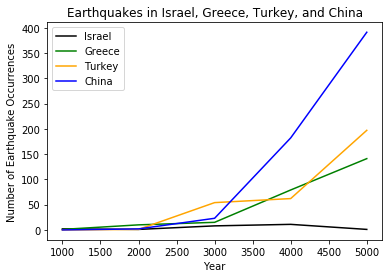

In [151]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting the year values

year = [1000,2000,3000,4000,5000]

# Number of earthquakes in Israel, Greece, Turkey and China

Country_Israel = [2,1,8,11,1]
Country_Greece = [1,10,15,79,141]
Country_Turkey = [0,1,54,62,197]
Country_China = [0,2,23,182,391]

# Setting the color for each country
plt.plot(year, Country_Israel, color='black',label = 'Israel')
plt.plot(year, Country_Greece, color='green',label = 'Greece')
plt.plot(year, Country_Turkey, color='orange', label ='Turkey')
plt.plot(year,Country_China, color = 'blue', label ='China')

# Naming the graph, X and Y axes

plt.xlabel('Year')
plt.ylabel('Number of Earthquake Occurrences')
plt.title('Earthquakes in Israel, Greece, Turkey, and China')
plt.legend()
plt.show()

## 3.3. Latitude and Longitude on a World Map


The geographical coordinates of the earthquake locations are plotted on a world map. 

In [152]:
# Accessing latitudes and longitudes from the main dataset

latitude_plot = bivariate_analysis['Latitude']
print(len(latitude_plot))

longitude_plot = bivariate_analysis['Longitude']
print(len(longitude_plot))


4361
4361


In [153]:
# Unique values of latitudes and longitudes

latitude_plot = bivariate_analysis['Latitude'].unique()
print(len(latitude_plot))

longitude_plot = bivariate_analysis['Longitude'].unique()
print(len(longitude_plot))

2757
3262


In [154]:
# Importing the required modules to code the world map

import plotly
from plotly import __version__
#print(__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import pandas as pd

In [155]:
# Reading in the dataset into a dataframe

world_map = pd.read_csv("C:\\Users\\Sharmila\\Sharmila_Kuthunur Analysis of NOAA Significant Earthquakes Dataset\\1. Preprocessing\\Dataset for Analysis.csv") 

# The text to be displayed while hovering

world_map['text'] = 'Country:' + ' ' +  world_map['Country'] + ' Region:' + ' ' +  world_map['Region'] + ' ' + ' Magnitude: ' +  world_map['Mag']

# Coding the world map

fig = go.Figure(data=go.Scattergeo(
        lon = world_map['Longitude'],
        lat = world_map['Latitude'],
        text = world_map['text'],
        mode = 'markers',
        ))

# Giving the map a name

fig.update_layout(
        title = 'Earthquakes since 2150 B.C. till 2019 on a World Map'
    )

# Displaying the map

fig.show()

## 3.4 Insights

### Years and Magnitude

    1. 1783 missing values for magnitude and none for years
    

### Paritioning Years to analyze trend
    
        0 to 1000: (a) Eight total entries.
                   (b) Israel had the highest number of earthquakes at 2.
                   (c) 7.3 was both the highest and most frequent magnitude earthquake during this time.
                   (d) 6.5 was the lowest magnitude in Israel
            
    1001 to 2001: (a) 27 total entries.
                  (b) Greece had the highest number of earthquakes at 10.
                  (c) 7.0 was the most frequent magnitude
                  (d) 7.6 was the highest magnitude in Kyrgyzstan.
                  (e) 6.2 was the lowest magnitude in China.
                
    2002 to 3002: (a) 191 total entries.
                  (b) Turkey had the highest number of earthquakes at 54.
                  (c) 7.0 was the most frequent magnitude. 
                  (d) 8.4 was the highest magnitude in Turkemenistan.
                  (e) 4.5 was the lowest magnitude in India.
                
    3003 to 4003: (a) 1591 total entries.
                  (b) China had the highest number of earthquakes at 182.
                  (c) 6.5 was the most frequent magnitude. 
                  (d) 9.1 was the highest magnitude in Yellow Sea.
                  (e) 3.2 was the lowest magnitude in Afghanistan.
       
    4004 to 5004: (a) 4327 total entries.
                  (b) China had the highest number of earthquakes at 391.
                  (c) 7.5 was the most frequent magnitude. 
                  (d) 9.5 was the highest magnitude in Zambia.
                  (e) 1.6 was the lowest magnitude in Afghanistan.
                

### Trends from graphs: 
    1. The number of magnitudes has sharply increased from -2150 to 2019. 
    2. The highest magnitude earthquakes have also been increasing over the years. 